## Question 1: Implementing Example 6.1 on page 157 of Computational Statistics for $r=2$, produce a plot similar to Figure 6.2, report the acceptance rate of your algorithm. Show the generated random samples by superimposing the following three items in another plot, using different line type for different curves, and display of a legend. 

Acceptance Rate: 0.9796238244514106


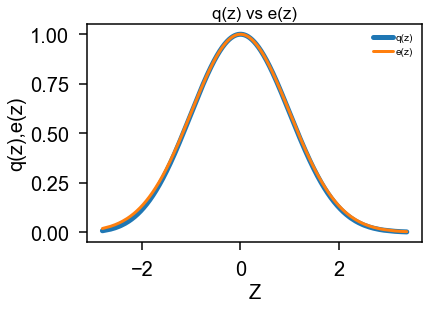

In [1]:
import numpy as np
from scipy.stats import norm
from scipy.stats import uniform
from scipy.stats import gamma
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

r = 2
a = r - (1/3)
b = 1 / np.sqrt(9*a)

def function_t(z):
    return a*((1+(b*z))**3)

def problem_1(z):
    return np.exp(((z**2)/2) + a*np.log(function_t(z)/a) - function_t(z) + a)

def e(z):
    return np.exp((-z**2)/2)

def q(z):
    return np.exp((a*np.log(function_t(z)/a)) - function_t(z) + a)

i = 0
num_times = 0
values = []
zs = []
qs = []
es = []

while i < 5000:
    z = norm.rvs(0,1)
    val = problem_1(z)
    u = uniform.rvs(0,1)
    if (val >= u and (function_t(z) > 0)):
        i += 1
        zs.append(z)
        values.append(function_t(z))
    num_times += 1
print("Acceptance Rate:",5000/num_times) 

zs.sort()
for n in zs:
    qs.append(q(n))
    es.append(e(n))

plt.plot(zs,qs,linewidth=5,label="q(z)")
plt.plot(zs,es,label="e(z)")
plt.xlabel('Z',fontsize=20)
plt.ylabel('q(z),e(z)',fontsize=20)
plt.title('q(z) vs e(z)',fontsize=17)
plt.legend()
plt.show()

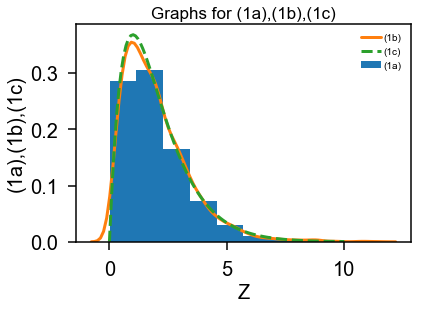

In [2]:
import seaborn as sns
# (1a) a relative frequency histogram with appropriate number of bars for your generated random numbers with sample 
# size n=5000.
# (1b) an estimated probability density curve based on the generated random numbers
# (1c) the true Gamma(2,1) probability density curve
plt.hist(values,density = True,label="(1a)")

sns.distplot(values,hist=False,label="(1b)")

x = np.linspace(0,10,100)
plt.plot(x,gamma.pdf(x,2),linestyle='--',label="(1c)")
plt.xlabel('Z',fontsize=20)
plt.ylabel('(1a),(1b),(1c)',fontsize=20)
plt.title('Graphs for (1a),(1b),(1c)',fontsize=17)
plt.legend()
plt.show()

## Question 2: Generate a random sample with size n = 5000 according to the following pdf. Produce a plot similar to figure 6.2. Report the acceptance rate of your algorithm. Your algorithm's acceptance rate must be higher than 50% - otherwise you will recieve only half of the full points. Show the generated random samples by superimposing the following three items in another plot, using different line type for different curve, and display of legend. 

Acceptance Rate: 0.6765899864682002


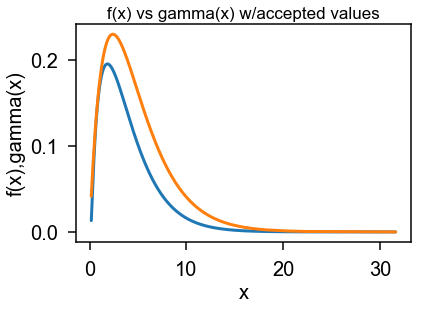

In [3]:
def f(x):
    return ((1/12)*(1+x))*np.exp(-((x-1)**2)/(2*x))

def gam(x):
    return 1.5*gamma.pdf(x,2,scale=2.4)
 
i = 0
num_times = 0
xs = []
qs = []
es = []

while i < 5000:
    x = gamma.rvs(2,scale=2.4)
    val = f(x) / gam(x)
    u = uniform.rvs(0,1)
    if (val >= u):
        i += 1
        xs.append(x)
    num_times += 1
print("Acceptance Rate:",5000/num_times)

xs.sort()
for n in xs:
    qs.append(f(n))
    es.append(gam(n))

plt.xlabel('x',fontsize=20)
plt.ylabel('f(x),gamma(x)',fontsize=20)
plt.title('f(x) vs gamma(x) w/accepted values',fontsize=17)
plt.plot(xs,qs,)
plt.plot(xs,es)
plt.show()

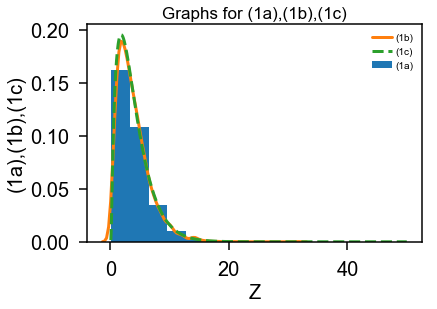

In [4]:
import seaborn as sns
# (2a) a relative frequency histogram with appropriate number of bars for your generated random numbers with sample 
# size n=5000.
# (2b) an estimated probability density curve based on the generated random numbers
# (2c) the true probability density curve
plt.hist(xs,density = True,label="(2a)")

sns.distplot(xs,hist=False,label="(2b)")



x = np.linspace(0.1,50,1000)
plt.plot(x,f(x),linestyle='--',label="(2c)")
plt.xlabel('Z',fontsize=20)
plt.ylabel('(2a),(2b),(2c)',fontsize=20)
plt.title('Graphs for (2a),(2b),(2c)',fontsize=17)
plt.legend()
plt.show()